In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


import FourierCollocation
# Reloading the module
import importlib
importlib.reload(FourierCollocation)
from FourierCollocation import *

Text(0.5, 1.0, '$u_0 = \\frac{3}{5-4\\cos(x)}$')

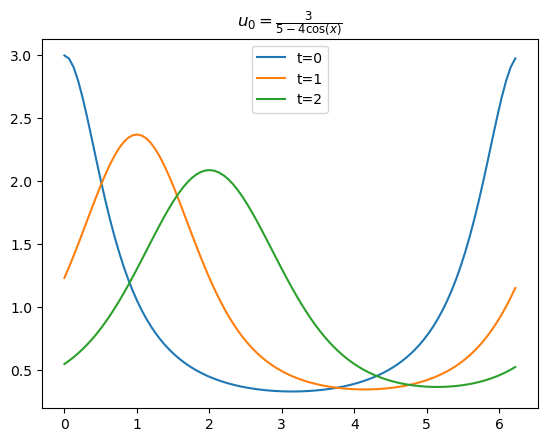

In [11]:
N = 100
J = np.arange(0,N)
x = 2 * np.pi / N * J
u0 = 3 / (5 - 4 * np.cos(x))
nu = 0.1

dt = 1e-3
tend = 1
u1 = ODE_RK3(u0, dt, tend, nu)
u2 = ODE_RK3(u1, dt, tend, nu)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, u0, label='t=0')
ax.plot(x, u1, label='t=1')
ax.plot(x, u2, label='t=2')
ax.legend()
ax.set_title(r'$u_0 = \frac{3}{5-4\cos(x)}$')

Text(0.5, 1.0, '$u_0 = \\sin^2(x) + \\frac{5}{1+\\cos^2(x)}$')

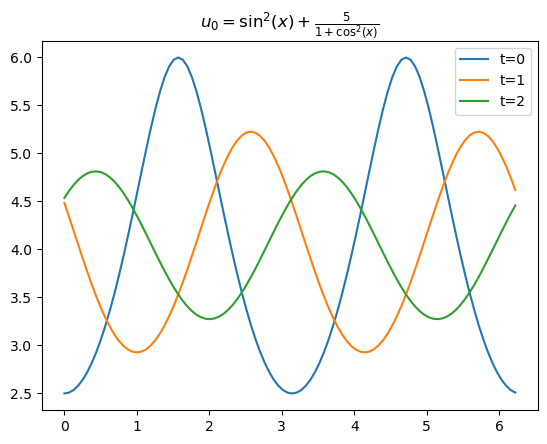

In [12]:
N = 100
J = np.arange(0,N)
x = 2 * np.pi / N * J
u0 = np.sin(x)**2 + 5 / (1+np.cos(x)**2)

dt = 1e-3
tend = 1
nu = 0.1
u1 = ODE_RK3(u0, dt, tend, nu)

u2 = ODE_RK3(u1, dt, tend, nu)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, u0, label='t=0')
ax.plot(x, u1, label='t=1')
ax.plot(x, u2, label='t=2')
ax.legend()
ax.set_title(r'$u_0 = \sin^2(x) + \frac{5}{1+\cos^2(x)}$')

Text(0.5, 1.0, 'Mine')

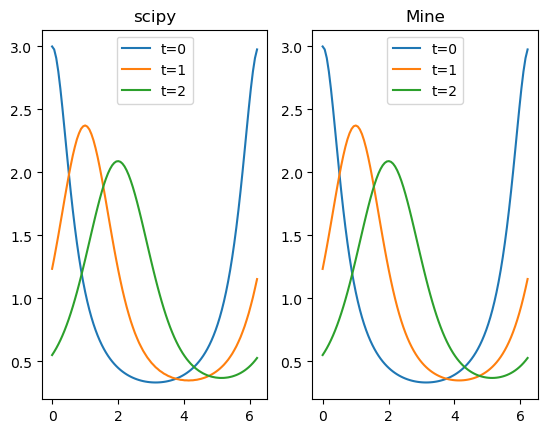

In [13]:
# Comparison with scipy
N = 100
J = np.arange(0,N)
x = 2 * np.pi / N * J
u0 = 3 / (5 - 4 * np.cos(x))
nu = 0.1
D = CalcFourierDiffMat(N)

# Scipy calculation
sol = solve_ivp(CalcRHS_AdvDif_DiffMat, 
                t_span=[0,2], 
                y0=u0, 
                method='RK45', 
                t_eval=[0,1,2], 
                args=(D, nu))


fig = plt.figure()
ax = fig.add_subplot(121)
ax.plot(x, sol.y[:,0], label='t=0')
ax.plot(x, sol.y[:,1], label='t=1')
ax.plot(x, sol.y[:,2], label='t=2')
ax.legend()
ax.set_title('scipy')


# My calculation
dt = 1e-3
tend = 1
u1 = ODE_RK3(u0, dt, tend, nu)
u2 = ODE_RK3(u1, dt, tend, nu)

ax = fig.add_subplot(122)
ax.plot(x, u0, label='t=0')
ax.plot(x, u1, label='t=1')
ax.plot(x, u2, label='t=2')
ax.legend()
ax.set_title('Mine')

Text(0.5, 1.0, 'DFT')

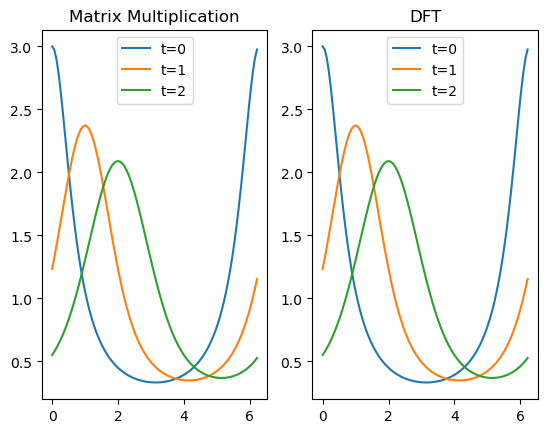

In [14]:
# Comparison with scipy
N = 100
J = np.arange(0,N)
x = 2 * np.pi / N * J
u0 = 3 / (5 - 4 * np.cos(x))
nu = 0.1
D = CalcFourierDiffMat(N)

# Differentiation with matrix multiplication
sol = solve_ivp(CalcRHS_AdvDif_DiffMat, 
                t_span=[0,2], 
                y0=u0, 
                method='RK45', 
                t_eval=[0,1,2], 
                args=(D, nu))


fig = plt.figure()
ax = fig.add_subplot(121)
ax.plot(x, sol.y[:,0], label='t=0')
ax.plot(x, sol.y[:,1], label='t=1')
ax.plot(x, sol.y[:,2], label='t=2')
ax.legend()
ax.set_title('Matrix Multiplication')



# Differentiation with DFT
sol = solve_ivp(CalcRHS_AdvDif_DFT, 
                t_span=[0,2], 
                y0=u0, 
                method='RK45', 
                t_eval=[0,1,2], 
                args=(nu,))

ax = fig.add_subplot(122)
ax.plot(x, sol.y[:,0], label='t=0')
ax.plot(x, sol.y[:,1], label='t=1')
ax.plot(x, sol.y[:,2], label='t=2')
ax.legend()
ax.set_title('DFT')